<a href="https://colab.research.google.com/github/AbdullahBogrek/data_science/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu çalışma, veri ön işleme ve veri setinin analizi üzerine bilgi sahibi olmak, kütüphanelerin kullanımını öğrenmek, edinilen teorik bilgileri pratiğe dökmek için yapılmıştır. Çalışma boyunca çeşitli literatür taramaları yapılmış ve elde edilen sonuçların farklı veri setleri üzerine nasıl uygulanacağı gözlemlenmiştir. Çeşitli projelerden alıntılar içermektedir.

# Veri Ön İşleme (Data Preprocessing)

Veri ön işleme, makine öğrenimi modelleri için gerekli olan **temel bir beceridir**. Çünkü ne kadar anlamlı ve işlevsel veriler varsa model başarısının o kadar artacağına inanıyoruz. Bundan dolayı veri ön işleme, makine öğrenimi progremlerinin çok büyük bir kısmını oluşturmaktadır. Veri setine ön işleme yaparak, modelin daha iyi sonuçlar üretme olasılığı artacaktır. Bir önceki cümlede ihtimalden bahsedilmesi zaten makine öğrenimi probleminin nasıl bir temele sahip olduğunu belirtmektedir. **İstatistik ve olasılık**. Amaç, veri setindeki gereksiz, eksik ya da yanlış(kullanıcı ya da kullanılan cihazlardan kaynaklı olabilir) verileri veri setinden temizleyerek ya da daha anlamlı hale getirerek model eğitimindeki doğruluğu(accuracy) arttırmaktır. Fakat uygulanan her ön işleme adımı veri setindeki doğruluğu arttırır gibi kesin bir cümle kullanamayız. Uygulanan ön işleme adımı veri seti için anlamsız olabileceği gibi veriler arası ilişkinin öğrenilmesine engel de olabilir. Bundan dolayı veri seti ilk önce **analiz edilmelidir**. Bu süreçte veri seti içerisindeki verilerin tiplerinden sayısına kadar bütün bilgilerin incelenip, veri setinin anlaşılması gerekmektedir. Böylece gereksiz sütunlar, eksik satırlar, model için anlamsız veriler model eğitimi öncesi işlenip anlamlı hale getirilir. Bu süreçte, veri seti üzerinde yukarıda bahsedilen manipülasyon ve analiz işlemleri için geliştirilmiş çeşitli veri görselleştirme ve düzenleme kütüphaneleri bulunmaktadır. Geliştiriciler tarafından bilinen, profesyonel iş süreçlerinde de sıklıkla kullanılan ve hala da açık kaynak olarak geliştirilmeye devam eden **[Pandas](https://github.com/pandas-dev/pandas)** kütüphanesi veri analizinde, **[Matplotlib](https://github.com/matplotlib/matplotlib)** kütüphanesi de veri görselleştirmede kullanılmaktadır.

## Veri Setinin Analizi


Daha önce de bahsedildiği gibi veri ön işleme adımlarından önce veri seti analiz edilmelidir. Bunun için ilk olarak veri setinin ``import`` edilmesi gerekmektedir. Sonra da **matplotlib** ya da **seaborn** gibi veri görselleştirme kütüphaneleri ve **pandas** gibi veri işlemede kütüphanleri kullanılır. Bu yazı boyunca [MNIST](http://yann.lecun.com/exdb/mnist/) veri seti ve [Penguin](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data) veri seti kullanılacaktır. Örnekler MNIST veri seti üzerinden verilmiştir fakat yazının sonunda Penguin veri seti kullanılarak sonuçların farklı bir veri seti üzerinde nasıl uygulandığı gösterilmektedir. Veri seti dosyaları indirilip projeye dahil edilebileceği gibi **keras** kütüphanesi içerisinden de projeye dahil edilebilmektedir.

In [ ]:
from keras.datasets import mnist

data = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = data

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
import pandas as pd

df = pd.DataFrame(y_train)
df.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

Text(0.5, 1.0, ' Digit 5(60000, 28, 28)')

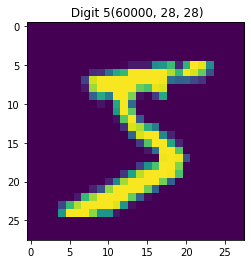

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.title(" Digit " + str(y_train[0]) + str(X_train.shape))

MNIST veri seti, yukarıdaki kod bloklarında da görüldüğü gibi 0 ile 9 dahil olmak üzere 10 tane rakamdan oluşmaktadır. Veri seti içerisindeki rakamlar 3. kod bloğunda da görüldüğü gibi eşit dağılmasa da birbirine yakındır. Bu her rakamın aynı derecede öğrenimi için iyi bir şeydir. Ayrıca veri seti 60000 eğitim ve 10000 test verisi olmak üzere ayrılmıştır. Her veri rakamlarım 28x28'lik piksel değerini içermektedir. Böylece veri seti içerisindeki veri türlerinin iyi bir şekilde dağıldığını, verilerin değerleri 0 ile 255 arasında olduğunu ve her verinin 28x28 matrislerden oluştuğu gözlemlenmiştir.

## Veri Ön İşleme

Makine öğrenmesi modellerinde kullanılacak MNIST gibi hazır ve yaygın olarak kullanılan veri setlerinde genellikle detaylı ön işleme adımları gerekmemektedir. Fakat gerçek hayat uygulamalarında veri seti hem elle oluşturulduğu için hem de boyutu büyük olduğu için detaylı ön işleme adımlarına ihtiyaç duyulmaktadır. Yine de veri setlerine uygulanabilecek ön işleme adımları bellidir. Bunlar;

1.   İlk adım, veri setindeki eksik verileri(missing data) ve anlamsız verileri(noisy data) manipüle etmektir. Bu adıma **data cleaning** denir. Buradaki amaç model eğitiminde modelin yanlış tahminler çıkarmasına olanak sağlayabilecek verileri daha anlamlı veriler ile değiştirerek model başarısını artırmaktır. Kullanılan yöntemler benzer olsa da veri setine göre değişebilir. Bu veri seti tam sayı tipinde piksel değerlerinden oluştuğu ve veri seti, veri setini oluşturanlar tarafından düzenlendiği için eksik ya da anlamsız verilerden oluşmamaktadır. Bundan dolayı bu adım bu veri seti için geçilecektir.

2.   İkinci adım, veri setindeki verilerin model eğitimi için uygun formlara dönüştürülmesidir. Bu adıma **data transformation** denir. Normalizasyon, standardizasyon ve encoding gibi yöntemler bu adımdadır. Normalizasyonda amaç, veri setindeki verileri daha küçük bir aralığa indirgeyerek sistem performansını artırmaktır. Çünkü makine öğrenmesi algoritmalarında sıklıkla matris çarpımı işlemleri yapılmaktadır. Büyük değerli matrislerle yapılan çarpma işlemi daha fazla işlem gücüne sebep olmaktadır. Bundan dolayı normalizasyon gibi verileri 0 ile 1 arasına indirgeyerek matris işlemleri için gerekli olan işlem gücü kayda değer bir oranda azalmaktadır. Bu tarz işlemler, bu tarz veri setleri için çok da gerekli olmasa da gerçek hayat projelerinde oldukça önem taşımaktadır. MNIST veri setinde veriler 0 ile 255 arasında olduğu için bütün piksel değerlerinin 0 ile 1 arasına indirgenmesi için 255'e bölünmesi yeterlidir. Fakat **scikit-learn** gibi kütüphanelerin hazır olarak sağladığı fonksiyonlar kullanılarak da yapılabilir. Encoding ise, kategorik verilerin nümerik verilere dönüştürülmesidir. Veri setindeki hedef değişkenler yani y_train ve y_test içerisindeki değerler kategorik değişkenlerdir ve model eğitiminde kullanılabilmesi için nümerik değişkenlere çevrilmelidir. Bu işlem için 2 yöntem vardır. Bunlar; **label encoding** ve **one hot encoding**'dir. Mantık aynıdır fakat uygulama yöntemleri farklıdır. Bu örnek için label encoding seçilmiştir. Keras kütüphanesi içerisindeki hazır metot kullanılarak gerçeklenecektir.

In [ ]:
# Normalizasyon
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Label Encoding
from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Kod çıktısında da görüldüğü gibi veri seti içerisindeki kategorik veriler nümerik verilere çevrildi. Veri setinin ilk değeri önceki kod bloğunda da gördüğümüz gibi 5 sayısı idi. Bu değer uygulanan fonksiyon ile yukarıdaki kod çıktısına dönüştürüldü.

3.   Üçüncü adım, büyük ölçekli verilerle çalışırken kullanılan depolama verimliliğini artırmak ve gerekli işlem gücünü minimize etmek için veri boyutunun azaltılmasıdır. Bu adıma **data reduction** denir. Bu işlem daha çok veri madenciliğinde kullanılmaktadır. Büyük boyuttaki veriler arasından veri setini temsil eden en iyi örneklemi belirleyip model eğitimini o veriler ile yapmaktır. Bu da hız ve hafıza kazancı sağlayacaktır. Bu adım altında uygulanan çeşitli yöntemler bulunmaktadır. Bunlardan birisi de **PCA (Principal Component Analysis)**'dir. Daha önce de belirtildiği gibi bu büyük boyutlu veri setleri için daha işlevsel olmaktadır. Bu veri seti için böyle bir işleme gerek yoktur.


Veri setindeki veriler model için uygun hale geldiği düşünüldükten sonra model eğitilir. Kullanılacak makine öğrenmesi algoritması veriler ile beslenerek veriler arası ilişkiyi öğrenmesi beklenir. Model eğitimi bittikten sonra elimizdeki test verileri ile modelin doğruluğu kontrol edilir. Önceki adımlarda da olduğu gibi bu işlemler hazır kütüphaneler kullanılarak gerçekleştirilir. 


## Palmer Archipelago (Antarctica) 

---

Veri Seti
![Palmer Penguens](https://miro.medium.com/max/1400/1*KU-V8tWWQU3nDtw12-bQ_g.png)
Veri seti ilk olarak Dr. Kristen Gorman ve Antarktika LTER'deki Palmer İstasyonu tarafından toplanmış ve kullanıma sunulmuştur. Palmerpenguins iki veri kümesinden oluşmaktadır. Biri ham verilerden, diğeri ise ham verilerin basitleştirilmiş sürümünden oluşmaktadır. Bu çalışmada verilerin basitleştirilmiş hali kullanılacaktır. Bu veri setinde Antarktika'daki Palmer Takımadaları'ndaki 3 adadan toplanan 3 farklı penguen türü bulunmaktadır. Ayrıca veri seti 344 satır ve 7 sütundan oluşmaktadır. Bu 7 sütun; tür, culmen uzunluğu, culmen derinliği, palet uzunluğu, vücut kütlesi, yaşadığı ada ve cinsiyettir.

### Veri kümesindeki iki veri setinin karşılaştırılması

Veri setini programa yüklemek, veri setini analiz etmek ve üzerinde çeşitli ön işleme adımlarını uygulayabilmek için `pandas, numpy` gibi kütüphanelerin `import` edilmesi gerekmektedir.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Data_Preprocessing/penguins_size.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Yukarıda da görüldüğü gibi ilk veri setinde toplam 7 sütun ve 344 satır veri vardır. Veri setinde toplamda 3 tür(species) penguen bulunmaktadır. Bunlar Adelie, Gentoo ve Chinstrap'dir. Bu veri seti diğer veri setinde bulunan fakat model tahmini gerekli olmayan verilerin çıkartılmış ve daha sade bir hale getirilmiş halidir.

In [ ]:
data = pd.read_csv("/content/Data_Preprocessing/penguins_lter.csv")
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
data.Species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

Yukarıda da görüldüğü gibi ikinci veri seti toplam 17 sütundan ve 344 satırdan oluşmaktadır. Fakat bu veri setindeki kuluçka süresi, yumurtalama tarihi gibi değerlerin çıkartılması ile ilk veri seti oluşturulmuştur. Bundan dolayı bu projede model için daha uygun olan ilk veri seti kullanılacaktır.

## Veri Setinin Görselleştirilmesi 

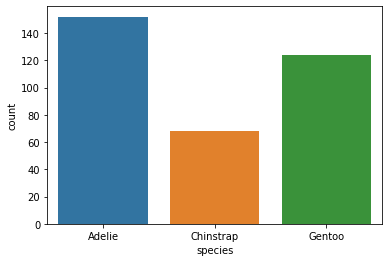

In [ ]:
sns.countplot(data=data, x='species')

Yukarıda da görüldüğü gib veri setindeki türlerin sayısal dağılımı bar grafiğinde görülmektedir. En fazla Adelie en az olarak da Chinstrap türüne ait veri bulunmaktadır. Bu veri türlerinin düzgün dağılmaması model eğitiminde zorluk çıkarabilir.

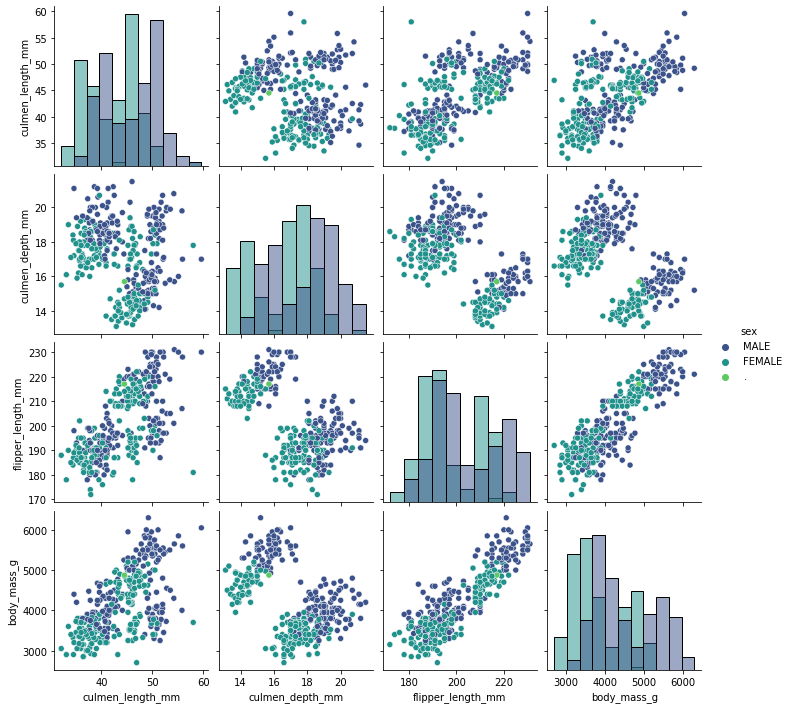

In [ ]:
sns.pairplot(data=data, hue='sex', diag_kind='hist', palette='viridis')

Yukarıda da görüldüğü gibi pair grafiğini cinsiyetin(sex) diğer özellikler arasındaki ilişkiyi gözlemlemek için kullanılmaktadır. Görüldüğü gibi veri setindeki bazı özelliklerin cinsiyet ile ilişkisi oldukça açıktır. Bu değerleri model eğitiminde kullanılabilir.

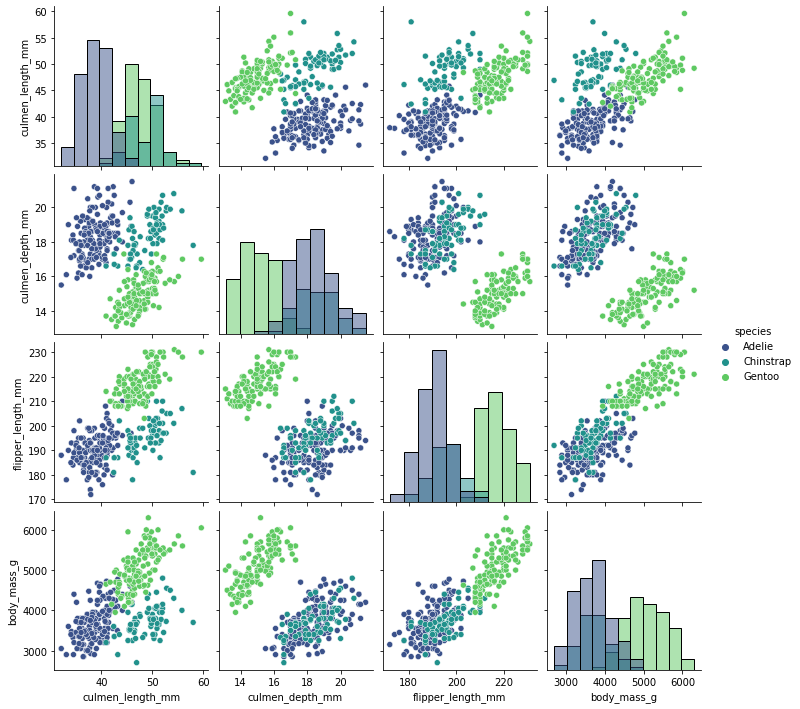

In [ ]:
sns.pairplot(data=data, hue='species', diag_kind='hist', palette='viridis')


Ayrıca veri setindeki tür değerlerinin diğer veriler ile olan ilişkisini gözlemlemek için yine pair grafiği kullanılmaktadır. Yukarıda da görüldüğü gibi culmen_depth ile body_mass arasındaki ilişki ya da culmen_lenght ve flipper_lenght arasındaki ilişki çok net bir şekilde görülmektedir. Böylece model ile classification yapılacağı zaman bu ilişkiler kullanılacaktır.

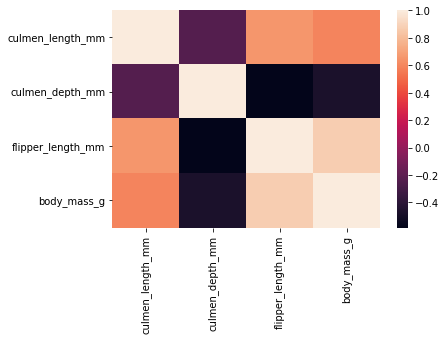

In [ ]:
sns.heatmap(data.corr())

Heatmap, pair grafiği gibi veri setindeki özellikler arasındaki ilişkiyi gözlemlemek için kullanılmaktadır. Bu projede de aynı amaç için kullanılmıştır. Grafikte de görüldüğü gibi bazı değerler arası ilişki yüksek iken bazı değerler arasi ilişki düşüştür.

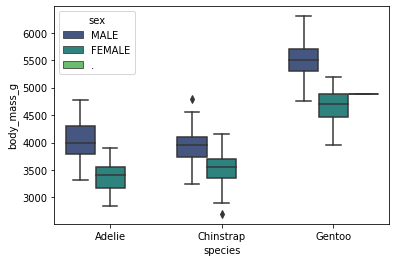

In [ ]:
sns.boxplot(data=data, x='species', y='body_mass_g', hue='sex', palette='viridis')

Yukarıdaki box grafiği ile tür ve cinsiyet arasındaki ilişkiyi görüntülenmektedir. Bu grafik ile cinsiyete bağlı olarak ağırlık farklılıkları gözlemlenebilmekte. Model eğitilirken cinsiyet değerlerinin kullanılabilmesi için nümerik veri tipine dönüştürülmelidir. Çünkü cinsiyet verileri kategorik verilerden oluşmaktadır.

## Veri Setinin Ön İşlenmesi

Veri ön işleme adımlarından ilki veri setindeki eksik değerlerin giderilmesidir. İlk olarak veri setindeki eksik değerlerin belirlenmesi gerekmektedir. Bunu yapmak için hazır metotlar kullanılmıştır.

In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Burada görüldüğü gibi species ve island değerleri dışında diğer verilerde null değerler bulunmaktadır. Model eğitiminde daha başarılı bir sonuç için bu eksik verilerin veri setinden çıkarılması ya da anlamlı veriler ile değiştirilmesi gerekmektedir. İlk olarak culmen_lenght sütunundaki eksik verileri, o sütundaki verilerin ortalaması ile değiştirilmiştir.

In [ ]:
data['culmen_length_mm'].fillna(data.groupby('island')['culmen_length_mm'].transform('median'), inplace = True)
data.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

İkinci işlem olarak culmen_depth sütundaki eksik verilerin giderilmesidir. Burada yapılan işlem culmmen_lenght ile aynıdır. Eksik verileri, o sütundaki eksik veriler ile değiştirilmiştir.

In [ ]:
data['culmen_depth_mm'].fillna(data.groupby('island')['culmen_depth_mm'].transform('median'), inplace = True)
data.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Flipper_length ve body_mass sütunlarındaki eksik verileri gidermek için de yine aynı yöntem kullanılmaktadır. Eksik veriler yerine, o sütundaki verilerin ortalaması atanmaktadır.

In [ ]:
data['flipper_length_mm'].fillna(data.groupby('island')['flipper_length_mm'].transform('median'), inplace = True)
data['body_mass_g'].fillna(data.groupby('island')['body_mass_g'].transform('median'), inplace = True)
data.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

En son olarak cinsiyet sütunundaki eksik verilerin giderilmelidir. Bunun cinsiyet sütunu görselleştirilmelidir. Çünkü aşağıda da görüldüğü gibi dişi ve erkek değerleri dışında "." değeri de bulunmaktadır. Bununla birlikte cinsiyet sütununda toplamda 11 anlamsız veri bulunmaktadır. Bu verileri anlamlı hale getirmek yerine, model eğitiminde türlerin sınıflandırmasında cinsiyetin önemli olduğu düşünülmediği için bu değerlerin veri setinden silinmesi tercih edilmiştir.

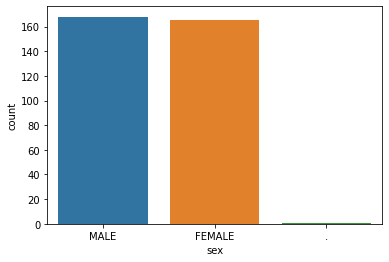

In [ ]:
sns.countplot(data=data, x='sex')

In [ ]:
data = data.drop('sex', axis = 1)
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

## Veri Seti için Öznitelik Mühendisliği

Veri setindeki kategorik değişkenlerin nümerik değişkenlere dönüştürülmesi model eğitiminde oldukça önemlidir. Bunun için label encoding veya one hot encoding yöntemi kullanılabilir. Bu yöntemlerin mantığı aynı olsa da uygulama yöntemi farklıdır. Bu projede label encoding yöntemi kullanılmıştır. İlk olarak island sütunundaki veriler nümerik verilere dönüştürülmüştür. Aşağıda da görülrüğü gibi 3 ada isimi 0, 1 veya 2 değerleri ile değiştirerek veriler nümerik hale getirilir. Bu işleme de label encoding denir.

In [ ]:
dataset = [data]
data.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
# Biscoe: 0, Dream: 1, Torgersen: 2
island_mapping = {"Biscoe": 0, "Dream": 1, "Torgersen": 2}

for _data in dataset:
    _data['island'] = _data['island'].map(island_mapping)

data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,2,39.1,18.7,181.0,3750.0
1,Adelie,2,39.5,17.4,186.0,3800.0
2,Adelie,2,40.3,18.0,195.0,3250.0
3,Adelie,2,38.9,18.4,191.0,3700.0
4,Adelie,2,36.7,19.3,193.0,3450.0


## Model Eğitimi

Model eğitilirken hem regresyon hem de sınıflandırma problemlerinde kullanılan random forest kullanılacaktır. Çünkü veri setindeki veri sayısının çok olmaması ve buna bağlı olarak veriler arasındaki ilişkinin iyi bir şekilde öğrenilebilmesi içindir.from sklearn.model_selection import train_test_split
 Ayrıca karar ağacı yöntemi ile de karşılaştırılacaktır. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report 

İlk olarak veri setini eğitim ve test olarak ayrıma işlemini yapabilmek için train_test_split metodu sklearn kütüphanesinden import edilir. Ayrıca model eğitiminde kullanılıcak decision tree ve random forest metotları ile birlikte sonuçları gözlemlemek gerekli metotlar import edilmiştir. 

In [ ]:
X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

İlk olarak veri seti train ve test olarak ayrılmıştır. X değeri, veri seti içerisindeki özniteliklerin hepsini kapsar iken y değeri, model tahmin etmesini istediğimiz değerleri tutar. Bu değerler species sütunu içerisindeki tür adlarıdır. Modeli X değerleri ile eğiterek y değerlerini tahmin etmesi sağlanacaktır.

In [ ]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

Sonra da sklearn içerisindeki DecisionTreeClassifier metodu çalıştırılarak eğitim verileri ile beslenir. Model bu veriler ile bir karar ağacı modeli oluşturur ve veriler arasındaki ilişkiyi çıkarır.

In [ ]:
pred_dt = tree.predict(X_test)

print("------------Karmaşıklık Matrisi-------------")
print('\n')
print(confusion_matrix(y_test, pred_dt))
print('\n')
print("-----------Sınıflandırma Raporu-------------")
print('\n')
print(classification_report(y_test, pred_dt))

------------Karmaşıklık Matrisi-------------


[[39  2  0]
 [ 1 25  0]
 [ 1  1 35]]


-----------Sınıflandırma Raporu-------------


              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        41
   Chinstrap       0.89      0.96      0.93        26
      Gentoo       1.00      0.95      0.97        37

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



Eğitilen modelin sonuçlarını gözlemleyebilmek için daha önceden ayrılan test verileri modelin sonuçları predict metodu ile kontrol edilir. Bu işlemin sonucu hem karmaşıklık matrisi hem de classification_report metodu ile ekrana yazdırılır.

In [ ]:
rfc = RandomForestClassifier(n_estimators=400)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print("------------Karmaşıklık Matrisi-------------")
print('\n')
print(confusion_matrix(y_test, pred_rfc))
print('\n')
print("-----------Sınıflandırma Raporu-------------")
print('\n')
print(classification_report(y_test, pred_rfc))

------------Karmaşıklık Matrisi-------------


[[41  0  0]
 [ 0 26  0]
 [ 0  0 37]]


-----------Sınıflandırma Raporu-------------


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
   Chinstrap       1.00      1.00      1.00        26
      Gentoo       1.00      1.00      1.00        37

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



Desicion Tree metodunun yanında ayrıca Random Forest metodu kullanılarak model eğitilmiştir. Böylece iki algoritma arasındaki sonuçlar aşağıdaki gibidir. Burada da görüldüğü gibi Random Forest ile Desicion Tree algoritmalarının sonuçları birbirine çok yakın olasa da Random Forest daha iyi bir sonuç vermiştir. Fakat bu fark daha büyük veri setlerinde daha öne çıkacaktır.

In [ ]:
print("------------Karar Ağacı Karmaşıklık Matrisi-------------")
print('\n')
print(classification_report(y_test, pred_dt))
print('\n')
print("------------Random Forest Karmaşıklık Matrisi-------------")
print('\n')
print(classification_report(y_test, pred_rfc))

------------Karar Ağacı Karmaşıklık Matrisi-------------


              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        41
   Chinstrap       0.89      0.96      0.93        26
      Gentoo       1.00      0.95      0.97        37

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



------------Random Forest Karmaşıklık Matrisi-------------


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
   Chinstrap       1.00      1.00      1.00        26
      Gentoo       1.00      1.00      1.00        37

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

